In [1]:
import time
start_time=time.time()

# Power Spectrum 3/3: Wiener-Khinchin Theorem. 

Abstract: The aim of the next code is to compare de 1DPSD obtained by applying the FFT to the auto correlation function and from the radial velocity map as stated by the Wiener-Khinchin theorem.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.fftpack
import random
from astropy.io import fits
import astropy.units as u
from scipy.stats import norm
from PIL import Image

from brownian import brownian
from Specter import specter,specterl,specterlt,specterltl,specterim
from SBR02 import sosf,acf,ps,sosfnorm,sosfw,sosfw2,sosfs,sosfnorms,sfwh,pst

import radial_data

In [3]:
data=pd.read_table('datos.txt')
data2=(data.round(2)).pivot(index='Y', columns='X', values='RV')

In [27]:
data

,X,Y,RV
0,128.736,19.6,-289.157579
1,127.395,19.6,-288.746455
2,126.054,19.6,-289.568704
3,124.713,19.6,-285.548819
4,123.372,19.6,-283.950002
...,...,...,...
325,91.188,0.0,-261.612236
326,89.847,0.0,-264.124664
327,88.506,0.0,-264.764191
328,87.165,0.0,-263.530817


Autocorrelation function on the original data (image).

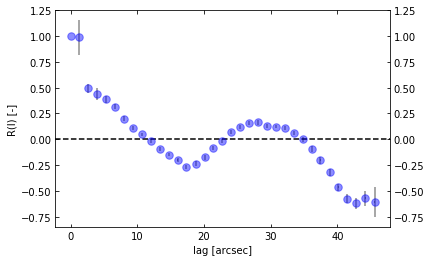

In [4]:
af=acf(data)

In [5]:
a=af.Nmqvd
b=scipy.fft(a)
c=b*np.conj(b)

Fourier Transfrom of the autocorrelation function.

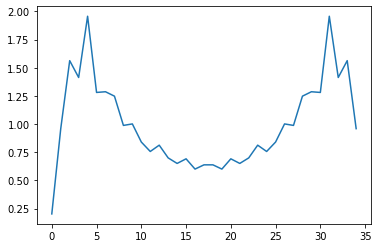

In [13]:
plt.plot(b)

Fourier Transfrom on the original data (image).

/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/base_statistic.py:66: UserWarning: Header missing beam information.
  warn("Header missing beam information.")
/home/zalenovo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
/home/zalenovo/anaconda3/lib/python3.7/site-packages/turbustat/statistics/elliptical_powerlaw.py:249: RuntimeWarning: divide by zero encountered in log10
  np.log10(x**2 * term1 + x * y * term2 + y**2 * term3)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     54.33
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           1.58e-06
Time:                        23:18:03   Log-Likelihood:               -0.56080
No. Observations:                  18   AIC:                             5.122
Df Residuals:                      16   BIC:                             6.902
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0938      0.178     17.338      0.0

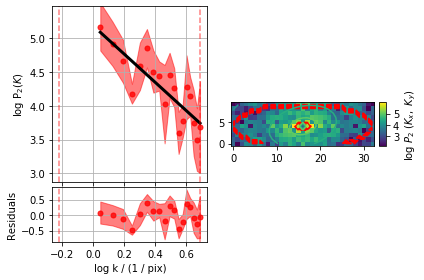

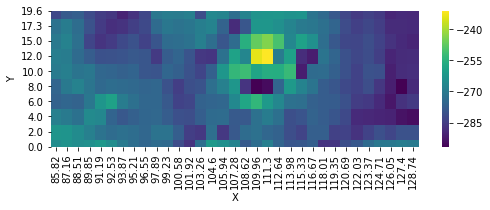

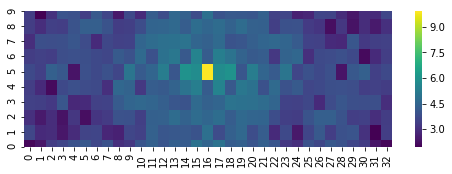

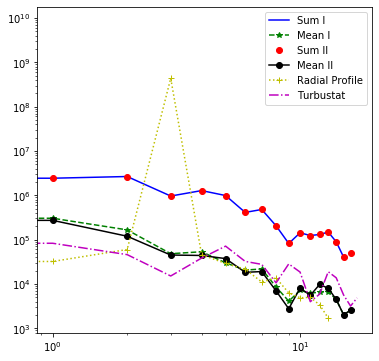

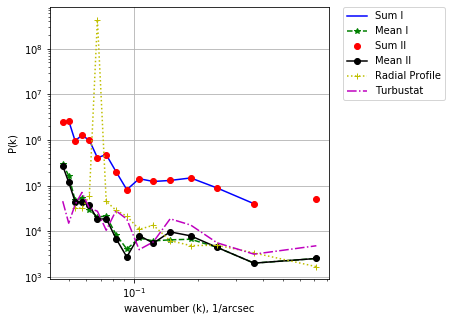

In [7]:
ps=specterl(data2)

Comparison between the OBB mean method and the FFt on the ACF.

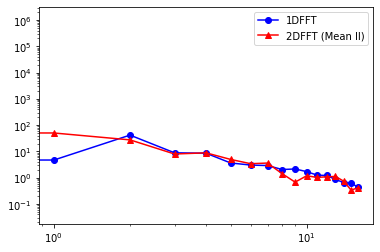

In [25]:
plt.loglog(c[0:len(a)//2],'bo-', label='1DFFT')
plt.loglog(ps[1]/6000,'r^-',label='2DFFT (Mean II)')
plt.legend()

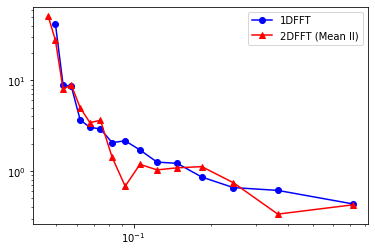

In [26]:
plt.loglog(ps[2][1:len(ps[1])],c[2:(len(a)//2)],'bo-',label='1DFFT')
plt.loglog(ps[2],(ps[1]/6000)[1:len(ps[1])],'r^-',label='2DFFT (Mean II)')
plt.legend()

In [10]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 15.364431142807007 seconds ---
